<a href="https://colab.research.google.com/github/rohannc/Comsys-Hackathon5/blob/main/Comsys_Hackathon5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import zipfile
import os
import numpy as np

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/My Drive/Comsys_Hackathon5.zip'


In [ ]:
my_zipfile = zipfile.ZipFile(data_path)
my_zipfile.extractall()
my_zipfile.close()

In [ ]:
def get_class_name_from_folder(directory_path):
    folders = [name for name in os.listdir(directory_path)
               if os.path.isdir(os.path.join(directory_path, name))]
    return np.array(sorted(folders))

In [ ]:
directory = "Comsys_Hackathon5/Task_B/all"
class_names = get_class_name_from_folder(directory)
print(class_names)

['001_frontal' '002_frontal' '003_frontal' ... 'Yoon_Young-kwan'
 'Yuri_Luzhkov' 'Zarai_Toledo']


In [ ]:
from pathlib import Path
import shutil

def move_files_to_outer_folder(inner_folder_path):
    inner_folder = Path(inner_folder_path)
    outer_folder = inner_folder.parent

    for file in inner_folder.iterdir():
        if file.is_file():
            shutil.move(str(file), outer_folder / file.name)

In [ ]:
for class_name in class_names:
  move_files_to_outer_folder("Comsys_Hackathon5/Task_B/train/" + class_name + "/distortion")

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def show_image(image_path, class_name):
    image_directory = image_path + class_name
    random_image = random.sample(os.listdir(image_directory), 1)

    image = mpimg.imread(image_directory + "/" + random_image[0])
    plt.imshow(image)
    plt.title(class_name)

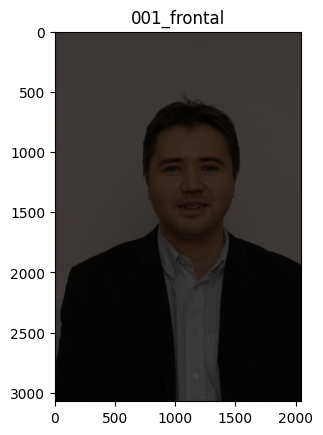

In [ ]:
show_image("Comsys_Hackathon5/Task_B/train/", "001_frontal")

In [ ]:
from pathlib import Path
import shutil

def merge_train_val_to_all(parent_dir_path):
    parent = Path(parent_dir_path)
    train_dir = parent / 'train'
    val_dir = parent / 'val'
    all_dir = parent / 'all'

    # Create 'all' directory if it doesn't exist
    all_dir.mkdir(exist_ok=True)

    # Move all folders from train
    if train_dir.exists():
        for item in train_dir.iterdir():
            if item.is_dir():
                shutil.move(str(item), all_dir / item.name)

    # Move all folders from val
    if val_dir.exists():
        for item in val_dir.iterdir():
            if item.is_dir():
                shutil.move(str(item), all_dir / item.name)

    # Remove train and val directories
    if train_dir.exists():
        shutil.rmtree(train_dir)
    if val_dir.exists():
        shutil.rmtree(val_dir)

    print(f"All folders moved to '{all_dir}'. 'train' and 'val' directories removed.")

merge_train_val_to_all('Comsys_Hackathon5/Task_B')

All folders moved to 'Comsys_Hackathon5/Task_B/all'. 'train' and 'val' directories removed.


In [ ]:
import os
import random
import shutil

def split_dir_to_train_test_val(directory = "images/",
                            train_size = 0.7,
                            test_size = 0.2,
                            val_size = 0.1):
  # Set random seed
  rng = random.Random(42)

  for root, folders, files in os.walk(directory):
    for folder in folders:
      # Create list of the files
      list_of_files = []
      for file_name in os.listdir(root + folder + "/"):
        list_of_files.append(file_name)

      #  Shuffle the list
      rng.shuffle(list_of_files)

      # Create lists of files
      train_files = list_of_files[:int(len(list_of_files) * train_size)]
      test_files = list_of_files[int(len(list_of_files) * train_size) : int(len(list_of_files) * (train_size+test_size))]
      val_files = list_of_files[int(len(list_of_files) * (train_size+test_size)):]

      # Create folders and files for train data
      for one_file in train_files:

        # Copy files
        dest_dir = "files/train/" + folder + "/"
        os.makedirs(dest_dir, exist_ok = True)

        shutil.copy2(src = (root+folder + "/" + one_file),
                    dst = (dest_dir + one_file))
      print(f"Folder {folder}. Train data copied. {len(train_files)} files")

      # Create folders and files for test data
      for one_file in test_files:
        # Copy  files
        dest_dir = "files/test/" + folder + "/"
        os.makedirs(dest_dir, exist_ok = True)

        shutil.copy2(src = (root + folder + "/" + one_file),
                    dst = (dest_dir + one_file))
      print(f"Folder {folder}. Test data copied. {len(test_files)} files")

      # Create folders and files for validation data
      for one_file in val_files:

        # Copy  files
        dest_dir = "files/validation/" + folder + "/"
        os.makedirs(dest_dir, exist_ok = True)

        shutil.copy2(src = (root + folder + "/" + one_file),
                    dst = (dest_dir + one_file))
      print(f"Folder {folder}. Validation data copied. {len(val_files)} files")

In [ ]:
def directory_exists(dir_path):
    path = Path(dir_path)
    return path.exists() and path.is_dir()

In [ ]:
for class_name in class_names:
  if(directory_exists("Comsys_Hackathon5/Task_B/all/" + class_name + "/distortion")):
    shutil.rmtree("Comsys_Hackathon5/Task_B/all/" + class_name + "/distortion")

In [ ]:
split_dir_to_train_test_val(directory="Comsys_Hackathon5/Task_B/all/",
                            train_size=0.7,
                            test_size=0.2,
                            val_size=0.1)

Folder Colin_Powell. Train data copied. 1321 files
Folder Colin_Powell. Test data copied. 378 files
Folder Colin_Powell. Validation data copied. 189 files
Folder Hamid_Karzai. Train data copied. 123 files
Folder Hamid_Karzai. Test data copied. 35 files
Folder Hamid_Karzai. Validation data copied. 18 files
Folder Emanuel_Ginobili. Train data copied. 3 files
Folder Emanuel_Ginobili. Test data copied. 1 files
Folder Emanuel_Ginobili. Validation data copied. 1 files
Folder Salma_Hayek. Train data copied. 72 files
Folder Salma_Hayek. Test data copied. 21 files
Folder Salma_Hayek. Validation data copied. 11 files
Folder Elin_Nordegren. Train data copied. 11 files
Folder Elin_Nordegren. Test data copied. 3 files
Folder Elin_Nordegren. Validation data copied. 2 files
Folder 044_frontal. Train data copied. 5 files
Folder 044_frontal. Test data copied. 2 files
Folder 044_frontal. Validation data copied. 1 files
Folder Tony_Stewart. Train data copied. 33 files
Folder Tony_Stewart. Test data copie

In [ ]:
print(len(os.listdir("files/train/")))
print(len(os.listdir("files/test/")))
print(len(os.listdir("files/validation/")))

941
900
1127


In [ ]:
import os
import random
from pathlib import Path
import shutil

def trim_folder_to_count(folder_path, target_count):
    folder = Path(folder_path)
    subfolders = [f for f in folder.iterdir() if f.is_dir()]
    excess = len(subfolders) - target_count

    if excess > 0:
        folders_to_delete = random.sample(subfolders, excess)
        for folder_to_delete in folders_to_delete:
            shutil.rmtree(folder_to_delete)  # deletes entire subfolder
        print(f"Removed {excess} folders from {folder}")
    else:
        print(f"No folders removed from {folder}. Already at or below target.")

# Set target count
target = 900

# Apply to each folder
trim_folder_to_count("files/train", target)
trim_folder_to_count("files/test", target)
trim_folder_to_count("files/validation", target)

Removed 41 folders from files/train
No folders removed from files/test. Already at or below target.
Removed 227 folders from files/validation


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)
val_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(directory="files/train",
                                               target_size=(240, 240),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(directory="files/test",
                                               target_size=(240, 240),
                                               batch_size=32,
                                               class_mode="categorical")

validation_data = val_datagen.flow_from_directory(directory="files/validation",
                                               target_size=(240, 240),
                                               batch_size=32,
                                               class_mode="categorical")

Found 10171 images belonging to 900 classes.
Found 3344 images belonging to 900 classes.
Found 1683 images belonging to 900 classes.


In [ ]:
tf.random.set_seed(42)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Input(shape=(240, 240, 3)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(900, activation="softmax")
])

# Compile the model
model.compile(loss="categorical_crossentropy",
              optimizer=Adam(),
              metrics=["accuracy"])


In [ ]:
history = model.fit(train_data,
                    batch_size=32,
                    epochs=3,
                    steps_per_epoch=len(train_data),
                    validation_data=validation_data,
                    validation_steps=len(validation_data))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
318/318 ━━━━━━━━━━━━━━━━━━━━ 310s 969ms/step - accuracy: 0.1239 - loss: 6.5488 - val_accuracy: 0.0303 - val_loss: 11.9351
Epoch 2/3
318/318 ━━━━━━━━━━━━━━━━━━━━ 317s 955ms/step - accuracy: 0.8763 - loss: 0.9546 - val_accuracy: 0.0541 - val_loss: 23.7913
Epoch 3/3
318/318 ━━━━━━━━━━━━━━━━━━━━ 309s 972ms/step - accuracy: 0.9939 - loss: 0.0535 - val_accuracy: 0.0535 - val_loss: 29.6340


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

def build_embedding_model():
    base_model = MobileNetV2(input_shape=(240, 240, 3), include_top=False, weights='imagenet')
    base_model.trainable = False  # freeze weights

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)  # 128-D face embedding

    model = Model(inputs=base_model.input, outputs=x)
    return model

embedding_model = build_embedding_model()


/tmp/ipython-input-65-1681503689.py:7: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(240, 240, 3), include_top=False, weights='imagenet')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def get_embedding(image_path, model):
    img = load_img(image_path, target_size=(240, 240))
    img_array = img_to_array(img)
    img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)

    embedding = model.predict(img_array, verbose=0)
    return embedding[0]  # return 1D vector


In [ ]:
from pathlib import Path

def build_face_database(dataset_dir, model):
    dataset_dir = Path(dataset_dir)
    face_db = {}

    for person_folder in dataset_dir.iterdir():
        if person_folder.is_dir():
            person_name = person_folder.name
            images = list(person_folder.glob("*.jpg"))[:1]  # Use first image only (or average multiple)
            embeddings = [get_embedding(str(img), model) for img in images]
            face_db[person_name] = np.mean(embeddings, axis=0)

    return face_db


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def recognize_face(test_image_path, face_db, model, threshold=0.5):
    test_embedding = get_embedding(test_image_path, model)

    similarities = {}
    for person, db_embedding in face_db.items():
        sim = cosine_similarity([test_embedding], [db_embedding])[0][0]
        similarities[person] = sim

    best_match = max(similarities, key=similarities.get)
    best_score = similarities[best_match]

    if best_score >= threshold:
        return best_match, best_score
    else:
        return "Unknown", best_score


In [ ]:
# Build DB from folders like: /faces/train/person_001/*.jpg
face_database = build_face_database("files/train", embedding_model)

# Predict person from test image
name, score = recognize_face("files/test/005_frontal/005_frontal_sunny.jpg", face_database, embedding_model)
print(f"Predicted: {name}, Similarity Score: {score:.2f}")


Predicted: 005_frontal, Similarity Score: 0.79


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagenerator = ImageDataGenerator(rescale=1./255)
test_datagenerator = ImageDataGenerator(rescale=1./255)

train_datagenerator = train_datagenerator.flow_from_directory(
    'Comsys_Hackathon5/Task_A/train',
    target_size=(128,128),
    batch_size=40,
    class_mode='binary')

test_datagenerator = test_datagenerator.flow_from_directory(
    'Comsys_Hackathon5/Task_A/val',
    target_size=(128,128),
    batch_size=10,
    class_mode='binary')

Found 1926 images belonging to 2 classes.
Found 422 images belonging to 2 classes.


In [ ]:
binary_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3),padding='same', activation='relu', input_shape=(128,128,3)),
    tf.keras.layers.MaxPooling2D((2,2),2),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2),2),

    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2),2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),

    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
print(binary_model.summary())

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │    16,777,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,871,489 (64.36 MB)

 Trainable params: 16,871,489 (64.36 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
binary_model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(0.001),
             metrics=['accuracy'])

In [ ]:
DESIRED_ACCURACY = 0.85

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        acc = logs.get('accuracy')          # Correct key
        val_acc = logs.get('val_accuracy')  # Correct key
        if acc is not None and val_acc is not None:
            if acc > DESIRED_ACCURACY and val_acc > DESIRED_ACCURACY:
                print("\nReached 95% accuracy, stopping training!")
                self.model.stop_training = True

callbacks = myCallback()


In [ ]:
binary_model.fit(
    train_datagenerator,
    epochs=100,
    validation_data = test_datagenerator,
    callbacks = [callbacks]
    )

Epoch 1/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.9955 - loss: 0.0206 - val_accuracy: 0.8389 - val_loss: 0.8606
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.9912 - loss: 0.0255 - val_accuracy: 0.8483 - val_loss: 0.7979
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9998 - loss: 0.0041 - val_accuracy: 0.8483 - val_loss: 1.1435
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.9998 - loss: 0.0030 - val_accuracy: 0.8341 - val_loss: 1.2809
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9970 - loss: 0.0099 - val_accuracy: 0.8460 - val_loss: 1.3397
Epoch 6/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.9962 - loss: 0.0118 - val_accuracy: 0.8483 - val_loss: 1.0537
Epoch 7/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.9999 - loss: 0.0020 - val_accuracy: 0.8483 - val_loss: 1.2070
Epoch 8/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9983 - loss: 0.0028 - val_accuracy: 0.8318 - v

In [ ]:
binary_model.save('my_model.keras')

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict_binary(image_path, model, class_indices, threshold=0.5):
    # Step 1: Load and preprocess the image
    img = load_img(image_path, target_size=(128, 128))
    img_array = img_to_array(img) / 255.0  # Rescale
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Step 2: Predict probability
    probability = model.predict(img_array)
    print(probability)
    prob = probability[0][0]

    # Step 3: Interpret the result
    predicted_class = 1 if prob >= threshold else 0

    # Step 4: Map index back to class name
    # class_indices is something like {'cat': 0, 'dog': 1}
    class_labels = {v: k for k, v in class_indices.items()}
    predicted_label = class_labels[predicted_class]

    print(f"Predicted: {predicted_label} (probability: {prob:.2f})")
    return predicted_label, prob


In [ ]:
# Get class indices from the data generator
class_indices = train_datagenerator.class_indices
count_female = 0
count_male = 0

for item in os.listdir("Comsys_Hackathon5/Task_A/val/male/"):
  if(predict_binary('/content/Comsys_Hackathon5/Task_A/val/male/' + item, binary_model, class_indices)[0] == 'female'):
    count_female = count_female + 1
  else:
    count_male = count_male + 1

print(count_male)
print(count_female)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
[[1.]]
Predicted: male (probability: 1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
[[1.]]
Predicted: male (probability: 1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[0.9999997]]
Predicted: male (probability: 1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[[1.]]
Predicted: male (probability: 1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[1.]]
Predicted: male (probability: 1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[0.9999999]]
Predicted: male (probability: 1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[1.]]
Predicted: male (probability: 1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[[0.01209195]]
Predicted: female (probability: 0.01)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[1.]]
Predicted: male (probability: 1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[0.80354726]]
Predicted: male (probability: 0.80)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[[0.02629074]]
Predicted: female (probability: 0.03)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[1.]]
Predicted: male (prob

In [ ]:
import os

def count_images(path):
    female_count = len(os.listdir(os.path.join(path, 'female')))
    male_count = len(os.listdir(os.path.join(path, 'male')))
    return female_count, male_count

train_female, train_male = count_images("Comsys_Hackathon5/Task_A/train")
val_female, val_male = count_images("Comsys_Hackathon5/Task_A/val")

print(f"Train set - Female: {train_female}, Male: {train_male}")
print(f"Val set   - Female: {val_female}, Male: {val_male}")


Train set - Female: 303, Male: 1623
Val set   - Female: 79, Male: 343


In [ ]:
from sklearn.utils import class_weight
import numpy as np

# Get class labels from training generator
y_train = train_datagenerator.classes  # Binary: 0 = female, 1 = male

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)


Class Weights: {0: np.float64(3.1782178217821784), 1: np.float64(0.5933456561922366)}


In [ ]:
binary_model.fit(
    train_datagenerator,
    epochs=20,
    validation_data=test_datagenerator,
    callbacks=[callbacks],
    class_weight=class_weights
)


Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.8460 - val_loss: 1.4552
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 1.0000 - loss: 2.1127e-04 - val_accuracy: 0.8389 - val_loss: 1.3866
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 1.0000 - loss: 1.0547e-04 - val_accuracy: 0.8412 - val_loss: 1.4162
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 1.0000 - loss: 5.3739e-05 - val_accuracy: 0.8412 - val_loss: 1.4396
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 1.0000 - loss: 5.5437e-05 - val_accuracy: 0.8389 - val_loss: 1.4642
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 1.0000 - loss: 5.5295e-05 - val_accuracy: 0.8412 - val_loss: 1.4801
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 1.0000 - loss: 3.7892e-05 - val_accuracy: 0.8412 - val_loss: 1.4996
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 1.0000 - loss: 3.6862e-05 - val_

KeyboardInterrupt: 

In [ ]:
def predict_gender(image_path, model, class_indices, threshold=0.5):
    from tensorflow.keras.preprocessing.image import load_img, img_to_array
    import numpy as np

    img = load_img(image_path, target_size=(128, 128))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prob = model.predict(img_array)[0][0]
    predicted_class = 1 if prob >= threshold else 0
    class_labels = {v: k for k, v in class_indices.items()}
    predicted_label = class_labels[predicted_class]

    print(f"Prediction probability: {prob:.4f}")
    print(f"Predicted class: {predicted_label}")
    return predicted_label, prob


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Predict all test images
test_labels = test_datagenerator.classes
preds = binary_model.predict(test_datagenerator)
pred_labels = (preds >= 0.5).astype(int)

# Map index back to labels
print(classification_report(test_labels, pred_labels, target_names=['female', 'male']))


43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step
              precision    recall  f1-score   support

      female       0.14      0.13      0.13        79
        male       0.80      0.82      0.81       343

    accuracy                           0.69       422
   macro avg       0.47      0.47      0.47       422
weighted avg       0.68      0.69      0.68       422



In [ ]:
train_datagenerator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# This must be the object returned by flow_from_directory
y_train = train_datagenerator.classes  # NOT the ImageDataGenerator, but the DirectoryIterator

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))
print("Class weights:", class_weights)


AttributeError: 'ImageDataGenerator' object has no attribute 'classes'